# Etude des sujets des amendements PLFSS

## Affichage des thématiques identifiées

In [ ]:
#!python -m pip install --upgrade pip

In [ ]:
#!pip install -q --upgrade sklearn matplotlib

In [ ]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import pickle
data_vectorized = pickle.load( open( "./data/amdt_data_vectorized.pickle", "rb" ) )
vectorizer = pickle.load( open( "./data/amdt_vectorizer.pickle", "rb" ) )
lda_Z = pickle.load( open( "./data/amdt_lda_Z.pickle", "rb" ) )
lda_model = pickle.load( open( "./data/amdt_lda_model.pickle", "rb" ) )

/home/ben/.virtualenvs/lex/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/ben/.virtualenvs/lex/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LatentDirichletAllocation from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


# Analyse des thématiques par LDA

LDA : https://fr.wikipedia.org/wiki/Allocation_de_Dirichlet_latente

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
 
NUM_TOPICS = 15
 
# vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
#                              stop_words='french', lowercase=True, 
#                              token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
#vectorizer = CountVectorizer()



In [ ]:
lda_Z.shape

(4797, 15)

In [ ]:
text = "Pour les entreprises de moins de 11 salariés, l’employeur est autorisé à attribuer une fois par an, à l’ensemble des salariés qu’il emploie, la prime exceptionnelle de pouvoir d’achat, dans les conditions prévues au V. »II. – En conséquence, compléter cet article par les deux alinéas suivants"
x = lda_model.transform(vectorizer.transform([text]))[0]
print(x, x.sum())

[0.00155039 0.00155039 0.00155039 0.00155039 0.04551269 0.00155039
 0.0346456  0.87081302 0.0319744  0.00155039 0.00155039 0.00155039
 0.00155039 0.00155039 0.00155039] 1.0


In [ ]:
len(vectorizer.get_feature_names())

/home/ben/.virtualenvs/lex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


15510

In [ ]:
import matplotlib.pyplot as plt

# code from https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(3, 5, figsize=(30, 25), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

/home/ben/.virtualenvs/lex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/ben/.virtualenvs/lex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


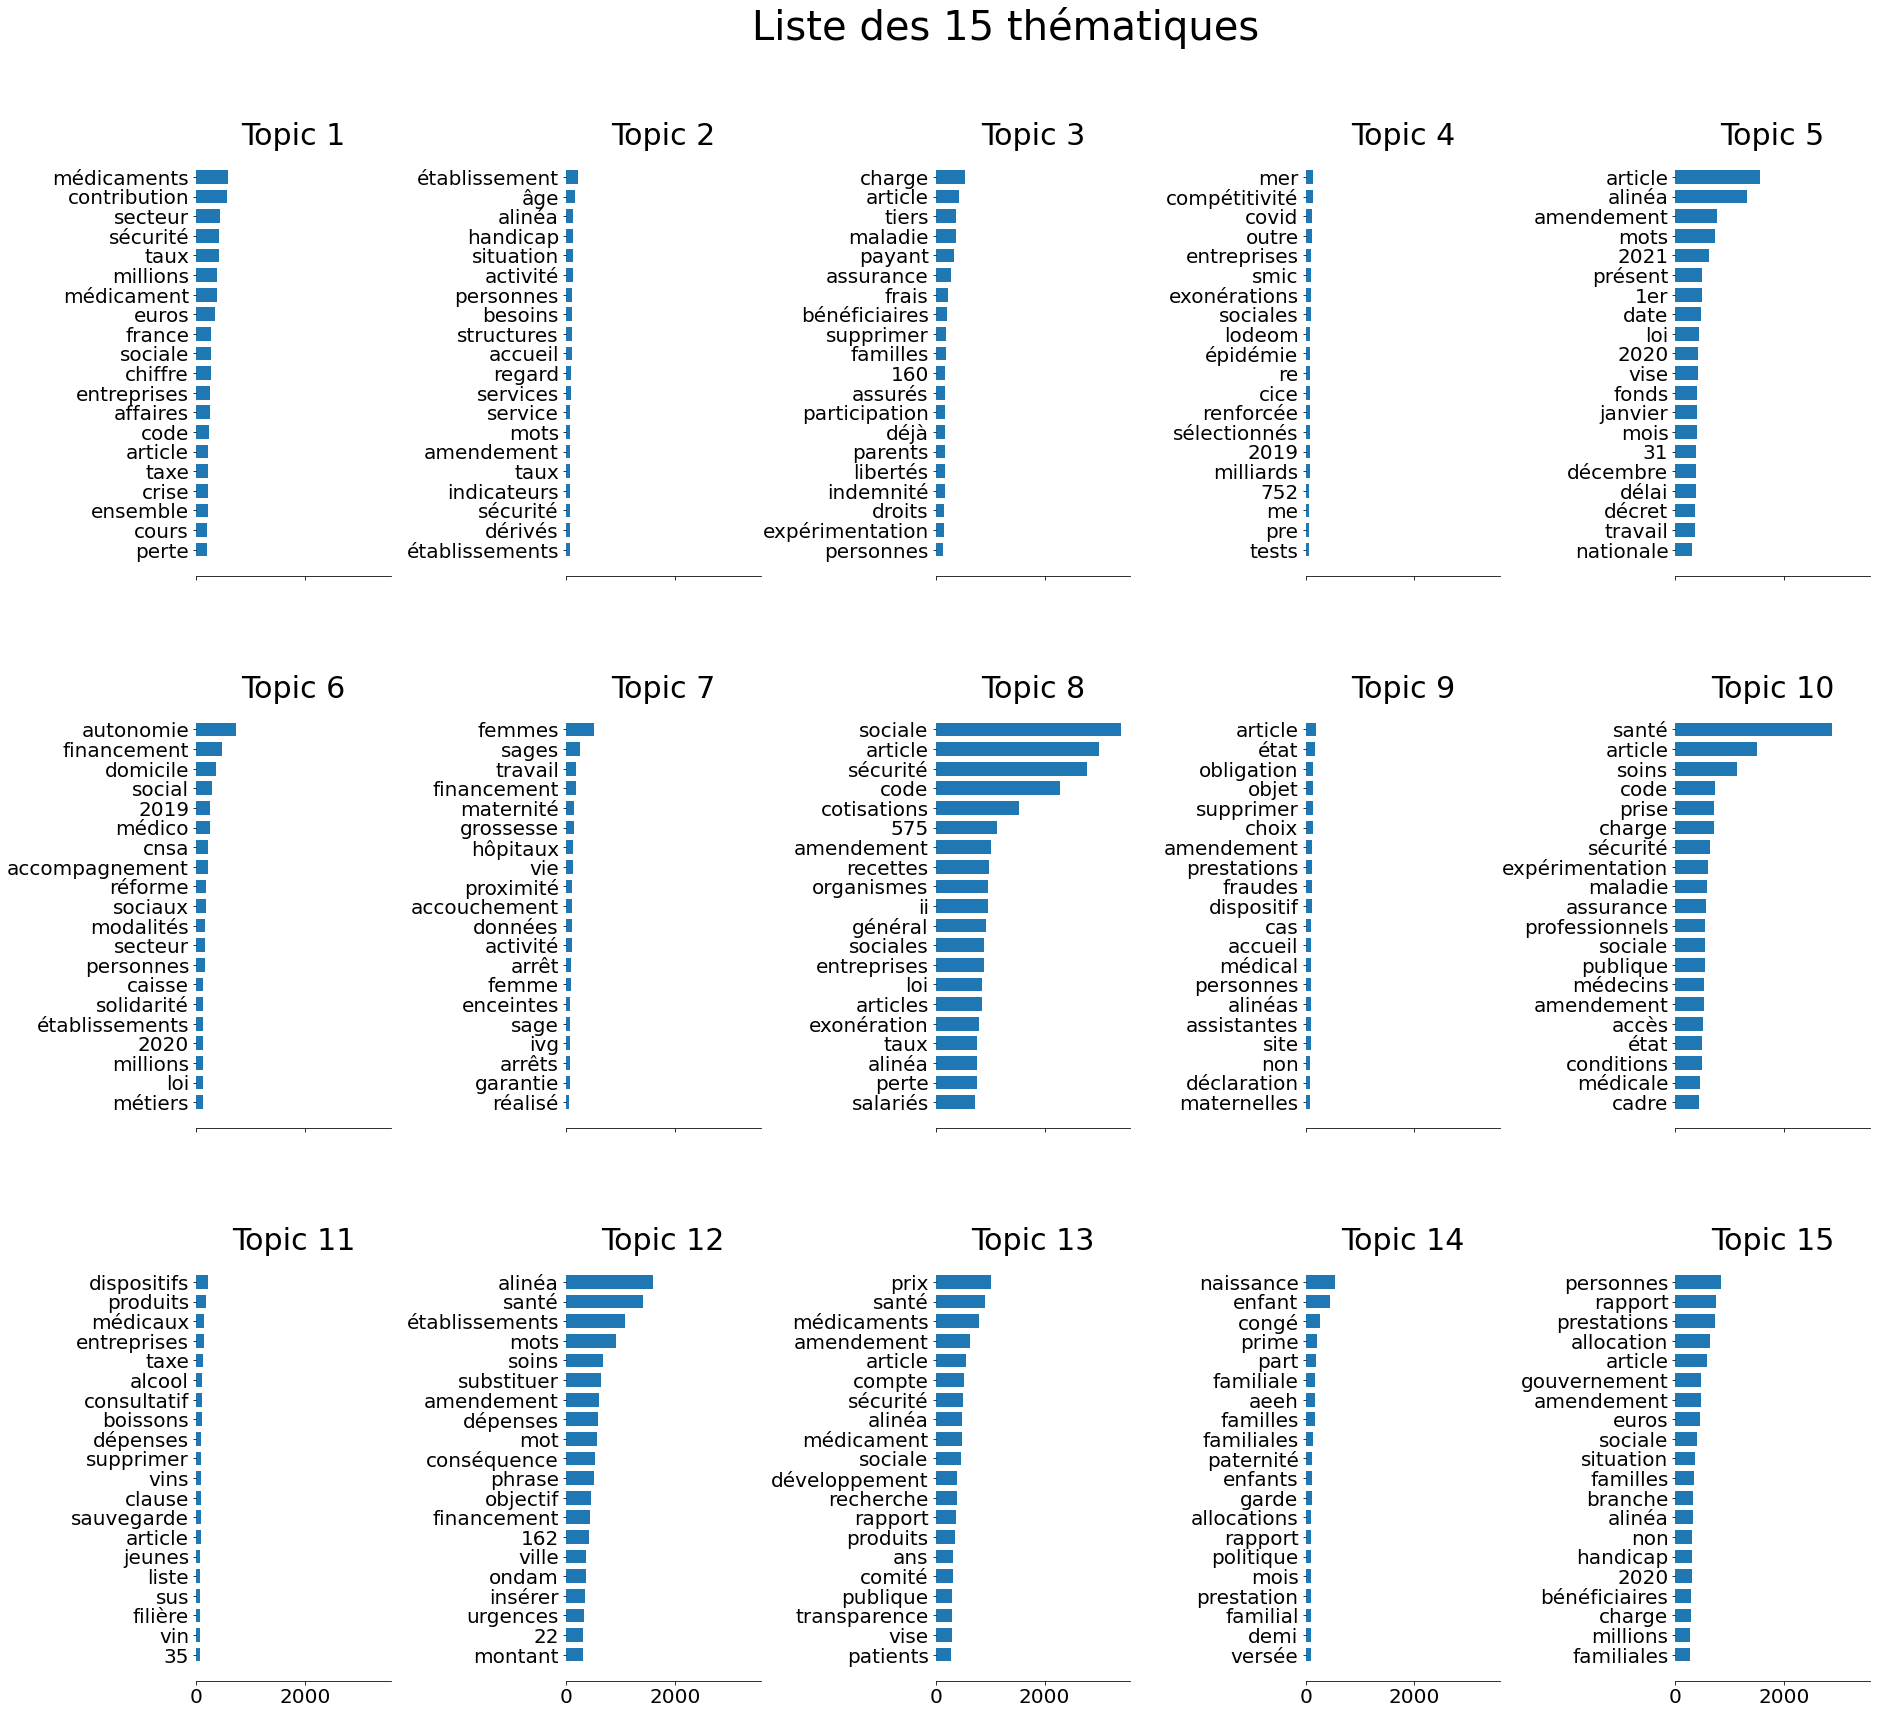

In [ ]:
n_top_words = 20

plot_top_words(lda_model, vectorizer.get_feature_names(), n_top_words,  'Liste des 15 thématiques')

### WIP : Interractive plot
TODO : Malheureusement ça ne focntionne pas encore sur tout les postes :(

In [ ]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
#pyLDAvis.enable_notebook(local=True)
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/home/ben/.virtualenvs/lex/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
7      114.344879  114.308296       1        1  22.016994
9      105.821045  -93.749626       2        1  14.903355
12    -138.334473   95.320763       3        1  10.729139
14      -7.436697  111.259697       4        1  10.239228
4     -207.550629 -105.472603       5        1   9.551996
11      52.817650   14.603765       6        1   7.716094
0      168.010849    6.806950       7        1   7.494363
2      -94.169601 -157.789551       8        1   3.977701
5     -122.849174  -39.059418       9        1   2.118482
13     -94.894264  195.408295      10        1   2.116337
10      24.927401 -180.464874      11        1   2.060996
8      -53.413467   26.832108      12        1   1.913970
1      -12.255850  -72.093201      13        1   1.777776
6     -224.217957   28.070581      14        1   1.741855
3       36.154255  209.427582      15        1   1.641713, topic_info=                 Term         Freq        Total Category  logprob  loglift
13163           santé  5874.000000  5874.000000  Default  30.0000  30.0000
6833      financement  1898.000000  1898.000000  Default  29.0000  29.0000
1946           alinéa  5120.000000  5120.000000  Default  28.0000  28.0000
2758        autonomie   873.000000   873.000000  Default  27.0000  27.0000
15375  établissements  1798.000000  1798.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
9355        milliards    62.913322   658.948204  Topic15  -4.9755   1.7605
393              2019    64.142965  1266.840293  Topic15  -4.9561   1.1263
14524            très    52.500889   483.923194  Topic15  -5.1564   1.8883
6391            euros    52.441089  1554.682134  Topic15  -5.1575   0.7201
12267        renforcé    43.618813   100.628426  Topic15  -5.3417   3.2735

[1003 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
0         15  0.983517     00
1          1  0.242505    000
1          3  0.006674    000
1          4  0.427164    000
1          7  0.253629    000
...      ...       ...    ...
15507      5  0.415565  œuvre
15507      6  0.031245  œuvre
15507      7  0.015623  œuvre
15507      8  0.046868  œuvre
15507     11  0.004687  œuvre

[2267 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 13, 15, 5, 12, 1, 3, 6, 14, 11, 9, 2, 7, 4])

In [ ]:
pyLDAvis.save_html(panel, 'lda.html')

/home/ben/.virtualenvs/lex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
